In [1]:
import os
import glob
import datetime as dt
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import yfinance as yf
yf.pdr_override() # <== that's all it takes :-)
import vectorbt as vbt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from concurrent import futures
from dateutil.relativedelta import relativedelta
from pandas_datareader import data as pdr
from scipy.stats import gaussian_kde

""" datetime util """
now = dt.datetime.now()
lastday = now + relativedelta(months=0, days=-1)
firstday_of_this_month = dt.datetime(now.year, now.month, 1)
lastday_of_this_month = dt.datetime(now.year, now.month, 1) + relativedelta(months=1, days=-1)
firstday_of_last_month = dt.datetime(now.year, now.month, 1) + relativedelta(months=-1, days=0)
lastday_of_last_month = dt.datetime(now.year, now.month, 1) + relativedelta(months=0, days=-1)

def last_working_day(given_date):
    while True:
        given_date -= dt.timedelta(days=1)
        if given_date.weekday() not in [5,6]:
            return given_date
        
""" set the download window """
start_date = "2017-01-01"
# start_date = now + relativedelta(days=-59)

end_date = last_working_day(now).strftime('%Y-%m-%d')
# end_date = "2023-01-27"


""" set the data_dir """
data_dir = "./data"
report_dir = "./report"
os.makedirs(data_dir, exist_ok=True)

In [3]:
print(end_date)

list_candidates = list(pd.read_csv(f"{report_dir}/most_attractives_{end_date}.csv")["stock"])
symbols = list_candidates
# symbols = list_candidates[:2]

2023-02-09


In [4]:
end_time = dt.datetime.now()
start_time = now - relativedelta(days=2)

# symbols = [ "BTC-USD", "ETH-USD" ]
price = vbt.YFData.download(
    symbols,
    interval='1m', 
    missing_index='drop',
    start=start_time,
    end=end_time
).get('Close')

# # Option 1
# df = vbt.YFData.download(
#     symbols,
#     interval='5m', 
#     missing_index='drop',
#     start=start_date,
#     end=end_date
# )
# print(data.get())
# df_close = data.get('Close')
# df_price = df_close[["BKNG"]

# # Option 2
# df = yf.download(tickers=symbol, period="5d", interval="1m")
# start = dt.datetime(2021, 10, 18, 9, 30, 0)
# end = dt.datetime(2021, 10, 18, 10, 30, 0)
# filtered = df[start: end]

# # Option 3
# df = pd.read_csv(f"./data/txn/{end_date}_{symbol}.csv")

# df.set_index["Date", inplace=True]

/home/ian/work/p-canslim_pyramid/venv/lib/python3.10/site-packages/vectorbt/data/base.py:527: UserWarning: Symbols have mismatching index. Dropping missing data points.
  data = cls.align_index(data, missing=missing_index)


In [5]:
price

symbol,BKNG,DOW,AVGO,CAT,HLT,MAR,HAL,JBHT,OGN,MPC,EPAM,DE,FANG,PSA,EOG
Datetime,,,,,,,,,,,,,,,
2023-02-07 17:20:00+00:00,2441.469971,60.150002,604.719971,248.054993,145.940002,172.729996,38.705002,196.509995,29.475000,121.300003,365.559998,407.559998,140.029999,299.679993,125.879997
2023-02-07 17:37:00+00:00,2435.389893,60.075001,604.820007,247.440002,145.809998,172.744995,38.415001,196.669998,29.530001,120.750000,366.000000,407.230011,139.645004,301.640015,125.250000
2023-02-07 17:41:00+00:00,2438.685059,60.230000,607.419983,248.375000,146.169998,173.279999,38.639999,197.309998,29.610001,121.260002,367.130005,408.579987,140.429993,302.109985,125.809998
2023-02-07 17:42:00+00:00,2438.639893,60.110001,605.390015,247.889999,145.830002,172.710007,38.500000,196.910004,29.540001,120.970001,365.709991,407.880005,140.000000,301.230011,125.410004
2023-02-07 17:43:00+00:00,2441.909912,60.230000,606.289978,248.190002,146.085007,173.020004,38.540001,197.300003,29.570000,120.970001,364.957794,408.390015,140.139999,301.529999,125.580002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-09 16:38:00+00:00,2463.260010,59.955299,610.167480,250.732895,151.425003,176.429993,37.880001,194.134995,29.485001,121.870003,372.709991,409.109985,142.750000,301.230011,127.690002
2023-02-09 16:41:00+00:00,2462.219971,59.939999,610.289978,250.740005,151.297501,176.270004,37.884998,193.850006,29.469999,121.959999,372.559998,409.059998,143.000000,300.609985,127.949997
2023-02-09 16:45:00+00:00,2465.655029,59.970001,610.349976,250.960007,151.289993,176.410004,37.869999,193.979996,29.465000,121.945000,373.480011,408.875000,142.914993,300.739990,127.934998


# Backtesting

In [ ]:
def custom_indicator(close, rsi_window = 14, ma_window = 50):
    close_5m = close.resample("5T").last() # 5 minutes
    # print(close)
    # print(close_5m)
    rsi = vbt.RSI.run(close_5m, window = rsi_window).rsi
    rsi, _ = rsi.align(close, 
                       broadcast_axis = 0,
                       method = 'ffill',
                       join = 'right',
                      )
    close = close.to_numpy()
    rsi = rsi.to_numpy()
    # print(rsi) #.to_string())
    # print(close)

    # print(rsi.iloc[0])
    # for x in range(len(rsi)):
    #     if rsi.iloc[x] >= 20:
    #         print(rsi.iloc[x])
    
    ma = vbt.MA.run(close, window = ma_window).ma.to_numpy()

    trend = np.where( rsi > 70, -1, 0)
    trend = np.where( (rsi < 30) & (close < ma), 1, trend)
    # print(rsi)
    # print(trend)
    return trend

    
ind = vbt.IndicatorFactory(
    class_name = "Combination",
    short_name = "comb",
    input_names = ["close"],
    param_names = ["rsi_window", "ma_window"],
    output_names = ["value"]
).from_apply_func(
    custom_indicator, 
    rsi_window = 14,
    ma_window = 50,
    keep_pd = True,
)

res = ind.run(
    price,
    rsi_window = 21,
    ma_window = 50,
)

print(res.value.to_string())

entries = res.value == 1.0
exits = res.value == -1.0


pf = vbt.Portfolio.from_signals(price, entries, exits)

print(pf.total_return())

# Hyperparameter Optimization

In [4]:
import vectorbt as vbt
import pandas as pd
import numpy as np
import datetime as dt
from dateutil.relativedelta import relativedelta

def last_working_day(given_date):
    while True:
        given_date -= dt.timedelta(days=1)
        if given_date.weekday() not in [5,6]:
            return given_date

report_dir = "./report"
now = dt.datetime.now()
end_date = last_working_day(now).strftime('%Y-%m-%d')

list_candidates = list(pd.read_csv(f"{report_dir}/most_attractives_{end_date}.csv")["stock"])
symbols = list_candidates

end_time = dt.datetime.now()
start_time = now - relativedelta(days=2)

# symbols = [ "BTC-USD", "ETH-USD" ]
price = vbt.YFData.download(
    symbols,
    interval='1m', 
    missing_index='drop',
    start=start_time,
    end=end_time
).get('Close')

def custom_indicator(close, rsi_window = 14, ma_window = 50, entry = 30, exit = 70):
    close_5m = close.resample("5T").last() # 5 minutes
    rsi = vbt.RSI.run(close_5m, window = rsi_window).rsi
    rsi, _ = rsi.align(close, 
                       broadcast_axis = 0,
                       method = 'ffill',
                       join = 'right',
                      )
    close = close.to_numpy()
    rsi = rsi.to_numpy()
    
    ma = vbt.MA.run(close, window = ma_window).ma.to_numpy()

    trend = np.where( rsi > entry, -1, 0)
    trend = np.where( (rsi < exit) & (close < ma), 1, trend)
    return trend

    
ind = vbt.IndicatorFactory(
    class_name = "Combination",
    short_name = "comb",
    input_names = ["close"],
    param_names = ["rsi_window", "ma_window", "entry", "exit"],
    output_names = ["value"]
).from_apply_func(
    custom_indicator, 
    rsi_window = 14,
    ma_window = 50,
    entry = 30,
    exit = 70,
    keep_pd = True,
)

res = ind.run(
    price,
    rsi_window = np.arange(10,40,step=3,dtype=int),
    # ma_window = np.arange(20,200,step=15,dtype=int),
    entry = np.arange(10,40,step=4,dtype=int),
    exit = np.arange(60,85,step=4,dtype=int),
    param_product = True
)

# print(res.value.to_string())

entries = res.value == 1.0
exits = res.value == -1.0


pf = vbt.Portfolio.from_signals(price, entries, exits)
# pf.stats()

returns = pf.total_return()
returns = returns [ returns.index.isin(["BKNG"], level="symbol")]

# print(returns.to_string())

print(returns.max())
print(returns.idxmax())

# print(pf.total_return().to_string())

/home/ian/work/p-canslim_pyramid/venv/lib/python3.10/site-packages/vectorbt/data/base.py:527: UserWarning: Symbols have mismatching index. Dropping missing data points.
  data = cls.align_index(data, missing=missing_index)


0.03758347193150456
(10, 10, 64, 'BKNG')


## Plotting

0.0063629901818428895
(64, 10, 'BKNG')


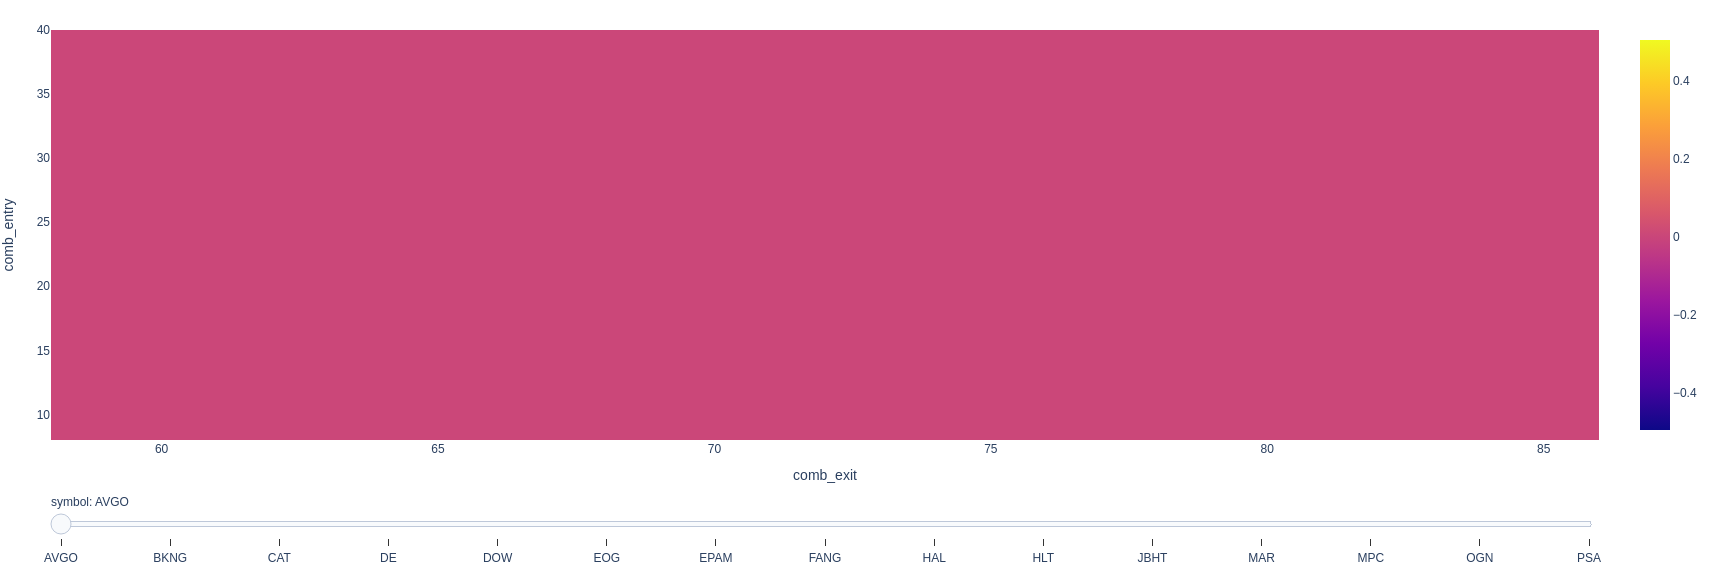

In [18]:
returns = pf.total_return()
# returns = returns [ returns.index.isin(["BKNG"], level="symbol")]
returns = returns.groupby(level=["comb_exit", "comb_entry", "symbol"]).mean()

print(returns.max())
print(returns.idxmax())

# print(returns.to_string())

"""comb_rsi_window comb_ma_window"""

fig = returns.vbt.heatmap(
    x_level = "comb_exit",
    y_level = "comb_entry",
    slider_level = "symbol"
)
fig.show()

"""comb_rsi_window comb_ma_window"""

# fig = returns.vbt.heatmap(
#     x_level = "comb_rsi_window",
#     y_level = "comb_ma_window",
# )
# fig.show()

# fig = returns.vbt.heatmap(
#     x_level = "comb_rsi_window",
#     y_level = "comb_entry",
#     slider_level = "symbol"
# )
# fig.show()

0.032208118015715714
(10, 10, 64, 'BKNG')


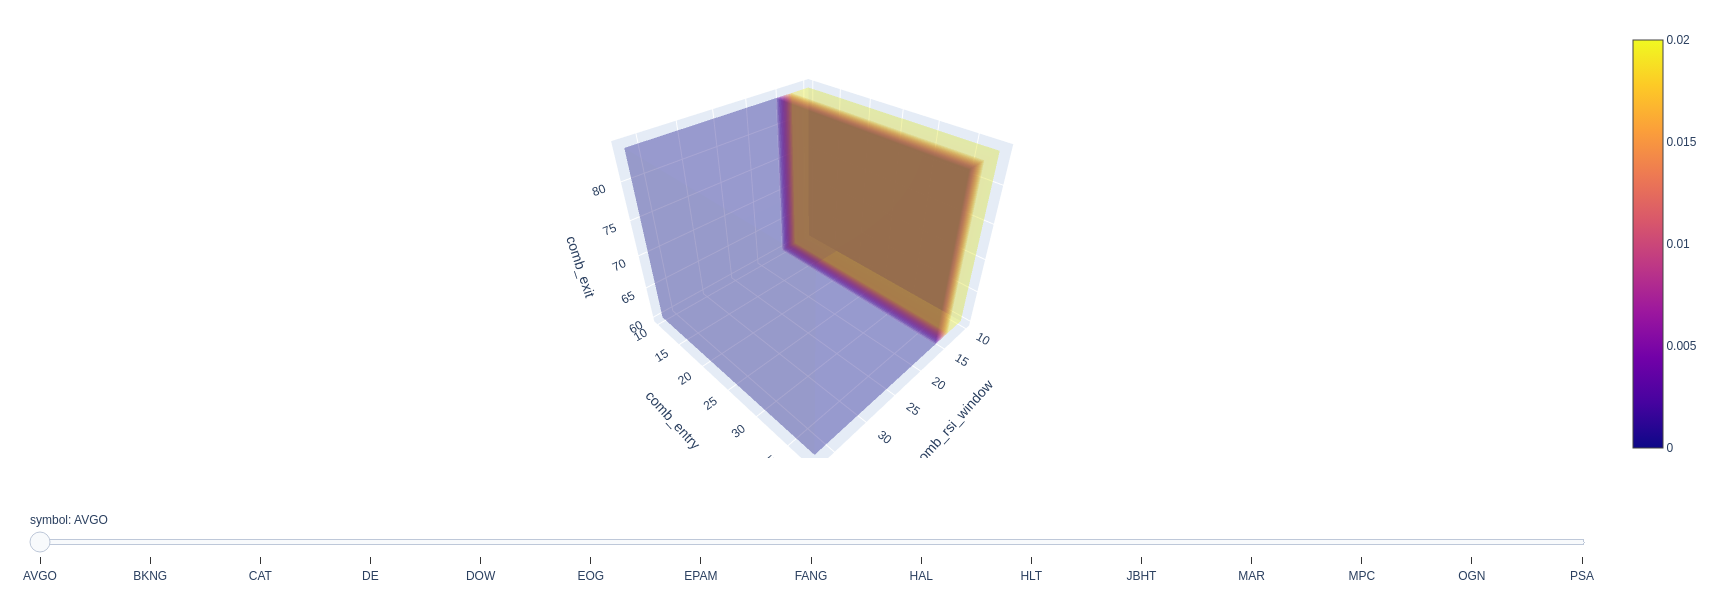

In [17]:
returns = pf.total_return()
# returns = returns [ returns.index.isin(["BKNG"], level="symbol")]
# returns = returns.groupby(level=["comb_exit", "comb_entry", "symbol"]).mean()

print(returns.max())
print(returns.idxmax())

# print(returns.to_string())

"""comb_rsi_window comb_ma_window"""

# fig = returns.vbt.heatmap(
#     x_level = "comb_exit",
#     y_level = "comb_entry",
#     slider_level = "symbol"
# )
# fig.show()

fig = returns.vbt.volume(
    x_level = "comb_rsi_window",
    y_level = "comb_entry",
    z_level = "comb_exit",
    slider_level = "symbol"
)
fig.show()

## 2-1)Hyperparameter Optimization

In [ ]:
num = 10
metric = "total_return"

indicator = vbt.RSI.run(price, window = 14, short_name = "rsi")  # indicators: MA, EMA, etc

In [ ]:
indicator.rsi

In [ ]:
indicator.rsi[14]["BKNG"].plot()

In [ ]:
num = 10
metric = "total_return"


# indicator = vbt.RSI.run(price, window = 14, short_name = "rsi")  # indicators: MA, EMA, etc
indicator = vbt.RSI.run(price_BKNG, window = 14, short_name = "rsi")  # indicators: MA, EMA, etc

entry_points = np.linspace(1, 45, num=num)
exit_points = np.linspace(55, 99, num=num)

entries = indicator.rsi_crossed_below(list(entry_points))
exits = indicator.rsi_crossed_above(list(exit_points))

# pf = vbt.Portfolio.from_signals(price, entries, exits)
# pf = vbt.Portfolio.from_signals(price, entries, exits, init_cash=100)
pf = vbt.Portfolio.from_signals(price_BKNG, entries, exits, init_cash=100)
pf.total_profit()

In [ ]:
pf.__dict__

In [ ]:
df = pf.close

In [ ]:
total_profit = pf.total_profit()

In [ ]:
(x, y, z, w) = total_profit.idxmax()

In [ ]:
print(x, y, z, w)

In [ ]:
int(y)

In [ ]:
pf_perf = pf.deep_getattr(metric)
pf_perf_matrix = pf_perf.vbt.unstack_to_df(index_levels = "rsi_crossed_above",
                                          column_levels = "rsi_crossed_below")

In [ ]:
pf_perf_matrix.__dict__

In [ ]:
pf_perf_matrix

In [ ]:
pf_perf_matrix.vbt.heatmap(
    xaxis_title = "entry",
    yaxis_title = "exit").show()

# Optimization Techniques - speed up using TA-Lib library

In [27]:
import datetime as dt
import numpy as np
import pandas as pd
import talib
import vectorbt as vbt

from dateutil.relativedelta import relativedelta
from numba import njit

def last_working_day(given_date):
    while True:
        given_date -= dt.timedelta(days=1)
        if given_date.weekday() not in [5,6]:
            return given_date

report_dir = "./report"
now = dt.datetime.now()
end_date = last_working_day(now).strftime('%Y-%m-%d')

list_candidates = list(pd.read_csv(f"{report_dir}/most_attractives_{end_date}.csv")["stock"])
symbols = list_candidates

end_time = dt.datetime.now()
start_time = now - relativedelta(days=2)

# symbols = [ "BTC-USD", "ETH-USD" ]
price = vbt.YFData.download(
    symbols,
    interval='1m', 
    missing_index='drop',
    start=start_time,
    end=end_time
).get('Close')
# price = price ["BKNG"]

RSI = vbt.IndicatorFactory.from_talib('RSI')

@njit
def product_signal(rsi, entry, exit):
    trend = np.where( rsi > entry, -1, 0)
    trend = np.where( (rsi < exit), 1, trend)
    return trend

def custom_indicator(close, rsi_window = 14, entry = 30, exit = 70):
    # rsi = vbt.RSI.run(close, window = rsi_window).rsi
    
    # print(close)
    # help(talib.RSI)
    # rsi = talib.RSI(close, rsi_window)
    rsi = RSI.run(close, rsi_window).real.to_numpy()
    return product_signal(rsi, entry, exit)

    
ind = vbt.IndicatorFactory(
    class_name = "Combination",
    short_name = "comb",
    input_names = ["close"],
    param_names = ["rsi_window", "entry", "exit"],
    output_names = ["value"]
).from_apply_func(
    custom_indicator, 
    rsi_window = 14,
    entry = 30,
    exit = 70,
    # keep_pd = True,
    # to_2d = False,
)

res = ind.run(
    price,
    rsi_window = np.arange(10,40,step=1,dtype=int),
    entry = np.arange(10,40,step=1,dtype=int),
    exit = np.arange(60,85,step=1,dtype=int),
    param_product = True,
)

# print(res.value.to_string())

entries = res.value == 1.0
exits = res.value == -1.0


pf = vbt.Portfolio.from_signals(price, entries, exits)
# pf.stats()

returns = pf.total_return()
# returns = returns [ returns.index.isin(["BKNG"], level="symbol")]

# print(returns.to_string())

print(returns.max())
print(returns.idxmax())

# print(pf.total_return().to_string())

/home/ian/work/p-canslim_pyramid/venv/lib/python3.10/site-packages/vectorbt/data/base.py:527: UserWarning: Symbols have mismatching index. Dropping missing data points.
  data = cls.align_index(data, missing=missing_index)


0.026500617449978704
(16, 10, 84, 'HLT')


## MeshGrid

In [ ]:
grid = np.array(np.meshgrid(list(entry_points), list(exit_points))).T.reshape(-1, 2)

In [ ]:
entries = indicator.rsi_crossed_below(list(grid[:, [0]]))
exits = indicator.rsi_crossed_above(list(grid[:, [1]]))

pf = vbt.Portfolio.from_signals(price_BKNG, entries, exits)
print(pf.stats())

In [ ]:
pf.__dict__

In [ ]:
(x, y, z, w) = total_profit.idxmax()

In [ ]:
# pf.plot().show()

In [ ]:
pf_perf = pf.deep_getattr(metric)
pf_perf_matrix = pf_perf.vbt.unstack_to_df(index_levels = "rsi_crossed_above",
                                          column_levels = "rsi_crossed_below")

# pf_perf = pf.deep_getattr(metric)
# pf_perf_matrix = pf_perf.vbt.unstack_to_df(index_levels = "rsi_crossed_above",
#                                           column_levels = "rsi_crossed_below",
#                                           symmetric = True)

pf_perf_matrix.vbt.heatmap(
    xaxis_title = "entry",
    yaxis_title = "exit").show()

In [ ]:
pf_perf_matrix.__dict__

In [ ]:
rsi = vbt.RSI.run(price_BKNG, window = 14, short_name = "rsi")  # indicators: MA, EMA, etc

entry_points = np.linspace(5, 25, num=num)
exit_points = np.linspace(80, 99, num=num)

grid = np.array(np.meshgrid(list(entry_points), list(exit_points))).T.reshape(-1, 2)

entries = rsi.rsi_crossed_below(list(grid[:, [0]]))
exits = rsi.rsi_crossed_above(list(grid[:, [1]]))

pf = vbt.Portfolio.from_signals(price_BKNG, entries, exits)
print(pf.stats())

In [ ]:
(rsi_crossed_below, rsi_crossed_above, window, symbol) = total_profit.idxmax()

In [ ]:
print (rsi_crossed_below, rsi_crossed_above, window, symbol)

In [ ]:
pf_perf = pf.deep_getattr(metric)
pf_perf_matrix = pf_perf.vbt.unstack_to_df(index_levels = "rsi_crossed_above",
                                          column_levels = "rsi_crossed_below")

# pf_perf = pf.deep_getattr(metric)
# pf_perf_matrix = pf_perf.vbt.unstack_to_df(index_levels = "rsi_crossed_above",
#                                           column_levels = "rsi_crossed_below",
#                                           symmetric = True)

pf_perf_matrix.vbt.heatmap(
    xaxis_title = "entry",
    yaxis_title = "exit").show()

In [ ]:
# res.stats()
pf.total_return()

# Others

In [ ]:
price

In [ ]:
price_BKNG = price[["BKNG"]]

In [ ]:
price_BKNG

In [ ]:
type(price)